In [158]:
import pandas as pd

In [159]:
data=pd.DataFrame()

Рассмотрим данные по потреблению первичной электроэнергии от солнечной энергии в период между экономическими ризисами с 2010 до 2020

[https://ourworldindata.org/](https://ourworldindata.org/grapher/primary-energy-consumption-from-solar?tab=chart&time=2010..2020&country=~USA)

In [160]:
primary_en=pd.read_csv('primary-energy-consumption-from-solar.csv')
primary_en

,Entity,Code,Year,Solar (TWh - equivalent)
0,Africa,NaN,1971,0.0000
1,Africa,NaN,1972,0.0000
2,Africa,NaN,1973,0.0000
3,Africa,NaN,1974,0.0000
4,Africa,NaN,1975,0.0000
...,...,...,...,...
5437,World,OWID_WRL,2017,1185.5150
5438,World,OWID_WRL,2018,1524.5497
5439,World,OWID_WRL,2019,1855.5922
5440,World,OWID_WRL,2020,2222.4430


In [161]:
primary_en=primary_en[(primary_en.Entity=='United States') & (primary_en.Year>2009) & (primary_en.Year<2021)]
primary_en

,Entity,Code,Year,Solar (TWh - equivalent)
5119,United States,USA,2010,8.362920
5120,United States,USA,2011,13.073000
5121,United States,USA,2012,24.778908
5122,United States,USA,2013,43.714870
5123,United States,USA,2014,79.149445
5124,United States,USA,2015,106.173836
5125,United States,USA,2016,148.361970
5126,United States,USA,2017,207.733870
5127,United States,USA,2018,249.513440
5128,United States,USA,2019,284.615780


In [162]:
y=primary_en['Solar (TWh - equivalent)']

Список всех ETF фондов на солнечную энергетику (в чистом виде):
- Invesco Solar ETF	 тикер [TAN](https://www.investing.com/etfs/claymore-mac-global-solar-energy-in-historical-data)
- iShares MSCI Kuwait ETF	[KWT](https://www.marketwatch.com/investing/fund/kwt/download-data?startDate=1/1/2009&endDate=12/31/2019)

KWT - нам не подойдет для анализа (данные с середины 2020 года)

In [163]:
TAN=pd.read_csv('TAN Historical Data.csv')
TAN.Date=pd.to_datetime(TAN.Date).dt.year
agg_func_count = {'Price': 'mean'}
TAN=TAN.groupby(['Date']).agg(agg_func_count)
TAN

,Price
Date,
2009,86.038333
2010,77.266667
2011,60.441667
2012,19.629167
2013,26.767500
2014,40.676667
2015,35.406667
2016,21.162500
2017,20.658333


In [164]:
data['TAN']=list(TAN.Price)
data.index=TAN.index

Список ETF инвестирующих в солнечную энергетику (смешанный тип):
- iShares Global Clean Energy ETF [ICLN](https://www.investing.com/etfs/ishares-s-p-global-clean-energy-historical-data)
- SPDR S&P Kensho Clean Power ETF [CNRG](https://www.investing.com/etfs/cnrg-historical-data) (не подойдет данные с конца 2018)
- Invesco Global Clean Energy ETF [PBD](https://www.investing.com/etfs/powershares---global-clean-energy-historical-data)
- Global X CleanTech ETF [CTEC](https://www.investing.com/etfs/ctec) (не подойдет данные с конца 2020)
- First Trust NASDAQ Clean Edge Green Energy Index Fund [QCLN](https://www.investing.com/etfs/firsttr.-nq-clean-edge-green-en.-historical-data)
- ALPS Clean Energy ETF [ACES](https://www.investing.com/etfs/alps-clean-energy) (не подойдет данные с конца 2018)



In [165]:
list_a_file=['ICLN Historical Data.csv', 'PBD Historical Data.csv', 'QCLN Historical Data.csv']
list_a_name=['ICLN', 'PBD', 'QCLN']

In [166]:
for name, file in zip(list_a_name, list_a_file):
    df=pd.read_csv(file)
    df.Date=pd.to_datetime(df.Date).dt.year
    agg_func_count = {'Price': 'mean'}
    df=df.groupby(['Date']).agg(agg_func_count)
    data[name]=df.Price

In [167]:
data

,TAN,ICLN,PBD,QCLN
Date,,,,
2009,86.038333,21.045833,14.253968,13.254841
2010,77.266667,16.740833,13.902659,15.111474
2011,60.441667,14.078333,12.296667,13.888845
2012,19.629167,7.578333,7.973520,9.568153
2013,26.767500,9.024167,10.164881,14.071667
2014,40.676667,10.885000,12.970079,19.045714
2015,35.406667,10.549167,12.011706,17.044603
2016,21.162500,8.781667,10.622857,14.695476
2017,20.658333,8.819167,11.905697,18.102709


Основные индексы американского рынка:
   - US 30
   - US 500
   - Dow Jones
   - S&P 500
   - Nasdaq
   - S&P 500 VIX
   - Dollar Index
   
 (Данные взяты с https://www.investing.com/)

In [168]:
list_b_file=['US 30 Cash Historical Data.csv', 'US 500 Cash Historical Data.csv', 
             'Dow Jones Industrial Average Historical Data.csv', 'NASDAQ Composite Historical Data.csv', 
              'CBOE Volatility Index Historical Data.csv', 'US Dollar Index Futures Historical Data.csv',
             
       ]
list_b_name=['US_30', 'US_500', 'Dow_Jones', 'NASDAQ', 'VIX', 'Dollar_Ind']


In [169]:
for name, file in zip(list_b_name, list_b_file):
    df=pd.read_csv(file)
    df.Date=pd.to_datetime(df.Date).dt.year
    df.Price=df.Price.apply(convert_num)
    agg_func_count = {'Price': 'mean'}
    df=df.groupby(['Date']).agg(agg_func_count)
    data[name]=df.Price

Основные товары американского рынка:
   - Crude Oil WTI 
   - Natural Gas
   - GOLD
   - Silver
   - Copper
   - Carbon

   
 (Данные взяты с https://www.investing.com/)

In [170]:
list_c_file=['Crude Oil WTI Futures Historical Data.csv', 'Natural Gas Futures Historical Data.csv', 
             'Gold Futures Historical Data.csv', 'Silver Futures Historical Data.csv', 
              'Copper Futures Historical Data.csv', 'Carbon Emissions Futures Historical Data.csv',
             
       ]
list_c_name=['WTI', 'GAZ', 'GOLD', 'Silver', 'Copper', 'Carbon']


In [171]:
for name, file in zip(list_c_name, list_c_file):
    df=pd.read_csv(file)
    df.Date=pd.to_datetime(df.Date).dt.year
    df.Price=df.Price.apply(convert_num)
    agg_func_count = {'Price': 'mean'}
    df=df.groupby(['Date']).agg(agg_func_count)
    data[name]=df.Price

In [172]:
data['coal']=[61.75, 93.85, 130.95, 117.45, 95.20, 82.35, 82.45, 48.8, 83, 104.35, 99.6]

In [184]:
data['Solar']=list(y)

In [229]:
data.to_csv('data.csv')

In [9]:
data=pd.read_csv('data.csv')

<AxesSubplot:>

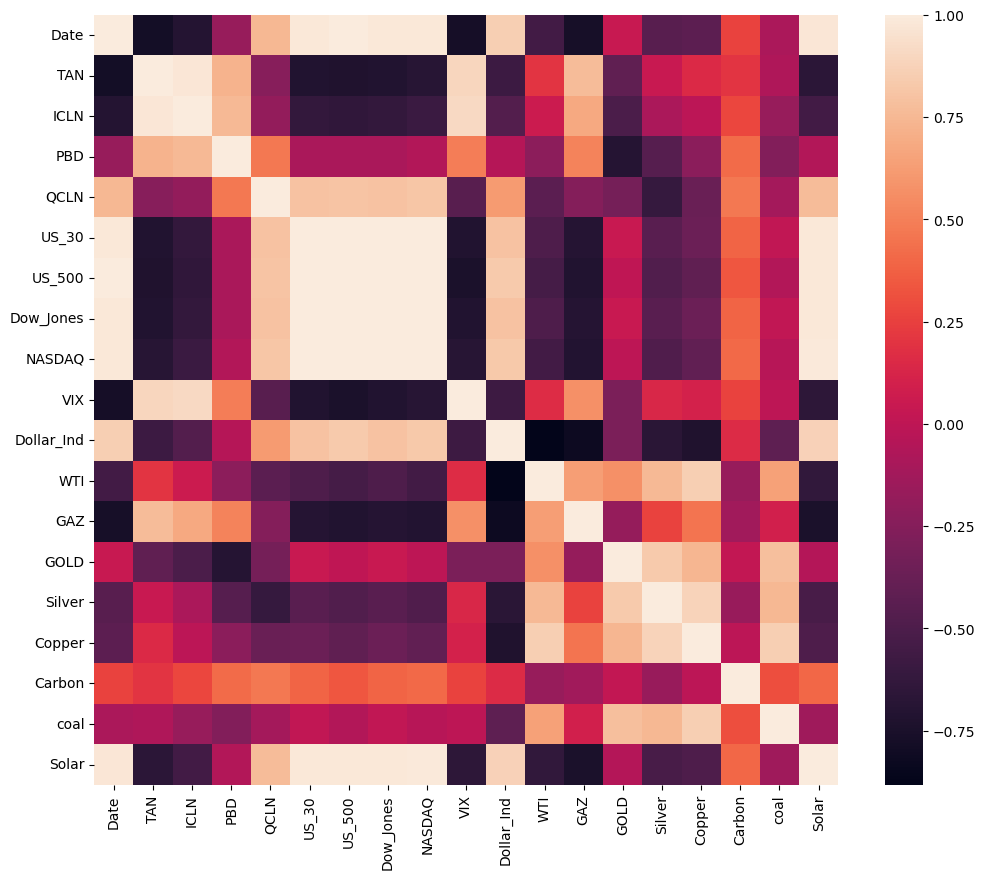

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame.from_records(data).corr())

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [12]:
X_train, y_train = data.drop(columns = ['Solar'],axis = 1), data.Solar

In [13]:
X_test, y_test = data.drop(columns = ['Solar'],axis = 1), data.Solar

In [24]:
pipe_lasso = make_pipeline(
    StandardScaler(),
    Lasso()
)

In [25]:
pipe_lasso.fit(X_train, y_train)
y_pred_lasso = pipe_lasso.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lasso))
print(f'R^2: {r2_score(y_test, y_pred_lasso)}')


MAE: 5.817833383100029
MAPE: 0.10590801291450593
R^2: 0.9964049640306691


In [26]:
pipe_linear = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [17]:
#pipe=StandardScaler()

In [27]:
pipe_linear.fit(X_train, y_train)
y_pred_linear = pipe_linear.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_linear))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_linear))
print(f'R^2: {r2_score(y_test, y_pred_linear)}')
print('slope:', pipe_linear.named_steps['linearregression'].coef_)

MAE: 9.414691248821327e-14
MAPE: 2.7982271752362826e-15
R^2: 1.0
slope: [ 22.48627813  -7.77140598  32.76475473 -13.74047082 -18.47792739
  32.84715805  17.00739098  32.84690619  19.01269485 -15.15490121
  16.5095174  -10.72489712  17.98102274  -4.48486929  16.17520327
   0.13584234  16.68454823 -14.42721271]


In [32]:
pipe_ridge = make_pipeline(
    StandardScaler(),
    Ridge(),
)

In [33]:
pipe_ridge.fit(X_train, y_train)
y_pred_ridge = pipe_ridge.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ridge))
print(f'R^2: {r2_score(y_test, pipe_ridge.predict(X_test))}')

MAE: 7.353364539058872
MAPE: 0.15656594269582078
R^2: 0.9938607056306725


In [36]:
pipe_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet()
)

In [37]:
pipe_elasticnet.fit(X_train, y_train)
y_pred_elasticnet = pipe_elasticnet.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_elasticnet))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_elasticnet))
print(f'R^2: {r2_score(y_test, pipe_elasticnet.predict(X_test))}')


MAE: 12.889613491821597
MAPE: 0.2044736863066854
R^2: 0.9812465894754424


In [83]:
pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [84]:
param_grid = {
    'randomforestregressor__n_estimators': list(range(1, 21)) 
}

grid_search = GridSearchCV(pipe_rf, param_grid, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print("Лучшее значение параметра n_estimators:", grid_search.best_params_)
print("MAE на тестовых данных для лучшей модели:", -grid_search.best_score_)
print('MAPE на тестовых данных для лучшей модели:', mape)

y_pred_rf = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
print(f'R^2: {r2}')

Лучшее значение параметра n_estimators: {'randomforestregressor__n_estimators': 19}
MAE на тестовых данных для лучшей модели: 60.77597074210526
MAPE на тестовых данных для лучшей модели: 0.3446748257862859
R^2: 0.9448019576696034


In [76]:
pipe_dt = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [77]:
pipe_gb = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [78]:
param_grid_dt = {
    'decisiontreeregressor__max_depth': list(range(1, 21))
}

param_grid_gb = {
    'gradientboostingregressor__max_depth': list(range(1, 21))
}


In [79]:
grid_search_dt = GridSearchCV(pipe_dt, param_grid_dt, scoring='neg_mean_absolute_error')
grid_search_gb = GridSearchCV(pipe_gb, param_grid_gb, scoring='neg_mean_absolute_error')

grid_search_dt.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             param_grid={'gradientboostingregressor__max_depth': [1, 2, 3, 4, 5,
                                                                  6, 7, 8, 9,
                                                                  10, 11, 12,
                                                                  13, 14, 15,
                                                                  16, 17, 18,
                                                                  19, 20]},
             scoring='neg_mean_absolute_error')

In [80]:
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_gb = grid_search_gb.predict(X_test)

In [82]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)

print("Лучшее значение параметра max_depth для DecisionTreeRegressor:", grid_search_dt.best_params_)
print("MAE на тестовых данных для DecisionTreeRegressor:", mae_dt)
print("MAPE на тестовых данных для DecisionTreeRegressor:", mape_dt)
print("R^2 на тестовых данных для DecisionTreeRegressor:", r2_dt)
print()
print("Лучшее значение параметра max_depth для GradientBoostingRegressor:", grid_search_gb.best_params_)
print("MAE на тестовых данных для GradientBoostingRegressor:", mae_gb)
print("MAPE на тестовых данных для GradientBoostingRegressor:", mape_gb)
print("R^2 на тестовых данных для GradientBoostingRegressor:", r2_gb)

Лучшее значение параметра max_depth для DecisionTreeRegressor: {'decisiontreeregressor__max_depth': 6}
MAE на тестовых данных для DecisionTreeRegressor: 0.0
MAPE на тестовых данных для DecisionTreeRegressor: 0.0
R^2 на тестовых данных для DecisionTreeRegressor: 1.0

Лучшее значение параметра max_depth для GradientBoostingRegressor: {'gradientboostingregressor__max_depth': 1}
MAE на тестовых данных для GradientBoostingRegressor: 0.3243736045053538
MAPE на тестовых данных для GradientBoostingRegressor: 0.01569686485267889
R^2 на тестовых данных для GradientBoostingRegressor: 0.9999814370306468


### Вывод

Исходя из полученных метрик две лучшие модели - это линейная регрессия и Лес Деревьев с глубиной 6. Впрочем, судя по показателям Деревья, скорее всего, переобучились. Это нужно будет проверить отдельно. 
Теперь модели можно сохранить и загрузить при  необходимости. 

In [93]:
import joblib

joblib.dump(pipe_linear, 'pipe_linear_model.pkl')
joblib.dump(pipe_dt, 'pipe_dt_model.pkl')

['pipe_dt_model.pkl']

In [94]:
pipe_linear_loaded = joblib.load('pipe_linear_model.pkl')
pipe_dt_loaded = joblib.load('pipe_dt_model.pkl')